**Mobile Price Range Prediction**

**Introduction**

Mobile price range prediction is essential in this era to facilitate decision-making, empower consumers, and enable businesses to navigate the complexities of a rapidly evolving and diverse mobile market.
Accurate price predictions assist consumers in planning their budgets effectively, aligning their preferences with available options and preventing unexpected financial burdens.

**Objectives**

1. Diverse Mobile Market

2. Evolving Technology

3. Affordability Concerns

4. Consumer Empowerment

5. Economic Considerations


#Dataset

In [92]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Datasets/mobile_price_prediction.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


#Feature Details

A collection of features characterizing mobile phones, including battery power, camera specifications, network support, memory, screen dimensions, and other attributes. The 'price_range' column categorizes phones into price ranges, making this dataset suitable for mobile phone classification and price prediction tasks

Total energy a battery can store in one time measured in mAh


clock_speed
speed at which microprocessor executes instructions

dual_sim
Has dual sim support or not

fc
Front Camera mega pixels

four_g
Has 4G or not

int_memory
Internal Memory in Gigabytes

m_dep
Mobile Depth in cm

mobile_wt
Weight of mobile phone

n_cores
Number of cores of processor

pc
Primary Camera mega pixels


ram
Random Access Memory in Mega Bytes

sc_h
Screen Height of mobile in cm

sc_w
Screen Width of mobile in cm

talk_time
longest time that a single battery charge will last when you are

three_g
Has 3G or not


price_range
This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high

#Checking for missing values,datatypes and distribution of classes

In [93]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [94]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

<Axes: xlabel='price_range', ylabel='count'>

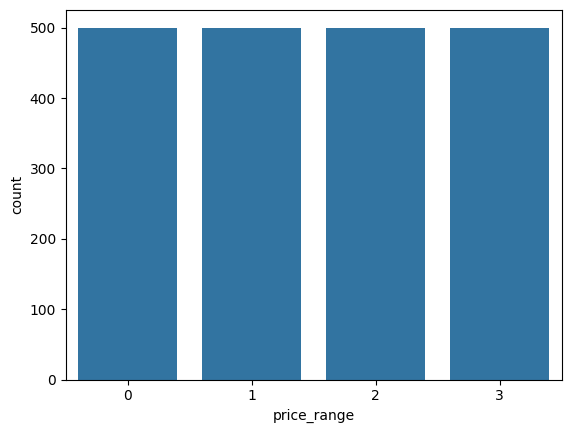

In [95]:
import seaborn as sns
sns.countplot(x='price_range',data=df)

In [96]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

#Model creation

In [97]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=3,test_size=0.3)


In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report

knn=KNeighborsClassifier(n_neighbors=9)
svc=SVC(kernel='rbf')
gnb=GaussianNB()
dc=DecisionTreeClassifier()
rfc=RandomForestClassifier(random_state=1,n_estimators=500,criterion='entropy',max_depth=4)
adc=AdaBoostClassifier(random_state=1)

model=[knn,svc,gnb,dc,rfc,adc]
for i in model:
  print(i)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
 # print(classification_report(y_test,y_pred))
  print('Accuracy Score: ',accuracy_score(y_test,y_pred))
  print()


KNeighborsClassifier(n_neighbors=9)
Accuracy Score:  0.43166666666666664

SVC()
Accuracy Score:  0.8683333333333333

GaussianNB()
Accuracy Score:  0.8166666666666667

DecisionTreeClassifier()
Accuracy Score:  0.7916666666666666

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=500,
                       random_state=1)
Accuracy Score:  0.8216666666666667

AdaBoostClassifier(random_state=1)
Accuracy Score:  0.56



#Feature Selection

In [99]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

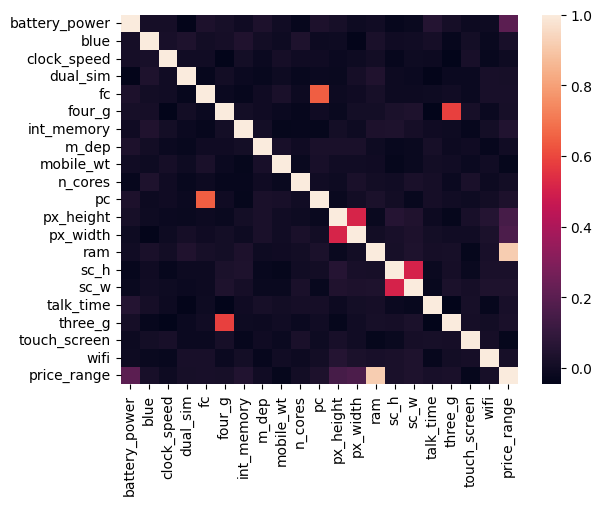

In [100]:
import seaborn as sns
sns.heatmap(df.corr())

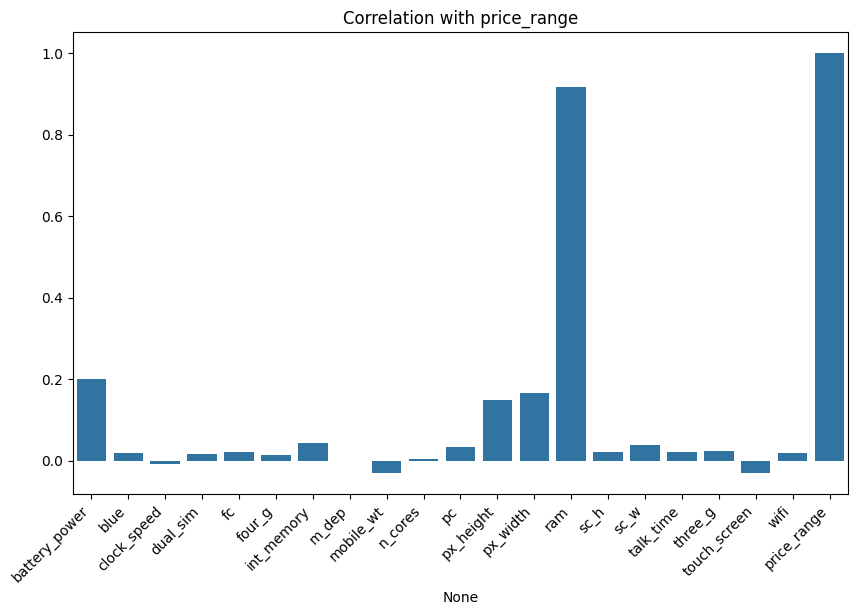

In [101]:

import matplotlib.pyplot as plt

# Specify the column for plotting the correlation heatmap
y_column = 'price_range'

# Calculate the correlation matrix for the entire DataFrame
correlation_matrix = df.corr()

# Extract the correlation values for the price_range column
subset = correlation_matrix[y_column]

# Plot the correlation values as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=subset.index, y=subset.values)
plt.title(f'Correlation with price_range')
plt.xticks(rotation=45, ha='right')
plt.show()

In [102]:
X_new=X.drop(['clock_speed','m_dep','n_cores','sc_h','sc_w'],axis=1)
X_new

,battery_power,blue,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi
0,842,0,0,1,0,7,188,2,20,756,2549,19,0,0,1
1,1021,1,1,0,1,53,136,6,905,1988,2631,7,1,1,0
2,563,1,1,2,1,41,145,6,1263,1716,2603,9,1,1,0
3,615,1,0,0,0,10,131,9,1216,1786,2769,11,1,0,0
4,1821,1,0,13,1,44,141,14,1208,1212,1411,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,106,14,1222,1890,668,19,1,1,0
1996,1965,1,1,0,0,39,187,3,915,1965,2032,16,1,1,1
1997,1911,0,1,1,1,36,108,3,868,1632,3057,5,1,1,0
1998,1512,0,0,4,1,46,145,5,336,670,869,19,1,1,1


In [103]:
scaler1=MinMaxScaler()
X_scaled_new=scaler1.fit_transform(X_new)

X_train,X_test,y_train,y_test=train_test_split(X_scaled_new,y,random_state=1,test_size=0.3)


In [104]:
knn1=KNeighborsClassifier()
svc1=SVC(kernel='rbf',random_state=1)
gnb1=GaussianNB()
dc1=DecisionTreeClassifier()
rfc1=RandomForestClassifier(random_state=1,n_estimators=500,criterion='entropy',max_depth=4)
adc1=AdaBoostClassifier(random_state=1)

model=[knn1,svc1,gnb1,dc1,rfc1,adc1]
for i in model:
  print(i)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
 # print(classification_report(y_test,y_pred))
  print('Accuracy Score: ',accuracy_score(y_test,y_pred))
  print()

KNeighborsClassifier()
Accuracy Score:  0.44666666666666666

SVC(random_state=1)
Accuracy Score:  0.8533333333333334

GaussianNB()
Accuracy Score:  0.7783333333333333

DecisionTreeClassifier()
Accuracy Score:  0.8633333333333333

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=500,
                       random_state=1)
Accuracy Score:  0.8116666666666666

AdaBoostClassifier(random_state=1)
Accuracy Score:  0.6833333333333333



#Hyperparameter Tuning on SVC

In [105]:
from sklearn.model_selection import GridSearchCV
params=[{'C':[1,10,100,1000],'kernel':['linear'],},
        {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}]

clf=GridSearchCV(svc1,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=1),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [106]:
print(clf.best_params_)

{'C': 1000, 'kernel': 'linear'}


#Finel Model

In [107]:
sv=SVC(C=1000,kernel='linear')
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)

print('Classification report and accuracy score of Support Vector Classifier')
print()

print('Report:',classification_report(y_test,y_pred))
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Classification report and accuracy score of Support Vector Classifier

Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       135
           1       0.97      0.94      0.96       149
           2       0.92      0.93      0.93       168
           3       0.94      0.96      0.95       148

    accuracy                           0.95       600
   macro avg       0.96      0.95      0.96       600
weighted avg       0.95      0.95      0.95       600

Accuracy Score:  0.9533333333333334


**Conclusion**

Best Model : SVC

Accuracy: 95.33

#Prediction

In [108]:
import warnings
warnings.filterwarnings(action='ignore')

In [109]:
y_new=sv.predict(scaler1.transform([[1965,1,1,0,0,39,187,3,915,1965,2032,16,1,1,1]]))
print(y_new)

[2]


In [110]:
y_new2=sv.predict(scaler1.transform([[794,1,1,0,1,2,106,14,1222,1890,668,19,1,1,0]]))
print(y_new2)

[0]


In [111]:
y__new=sv.predict(scaler1.transform([[842,0,0,1,0,7,188,2,20,756,2549,19,0,0,1]]))
print(y__new)

[1]


#File Downloading using pickle

In [112]:
import pickle
pickle.dump(sv,open('mobile_price_model.sav','wb'))
pickle.dump(scaler1,open('mobile_price_scaler.sav','wb'))

In [113]:
pickle.dump(df,open('dataset.sav','wb'))